## Introduction

This notebook goes through a necessary step of any data science project - data cleaning. Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

Getting the data - in this case trough a zip file

Cleaning the data - we will walk through popular text pre-processing techniques

Organizing the data - we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this notebook will be clean, organized data in two standard text formats:

- Corpus - a collection of text

- Document-Term Matrix - word counts in matrix format

Problem Statement

Our goal is to look at transcripts of various portuguese authors specifically, we would like to know who wrote these transcripts.

In [95]:
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.tokenize import word_tokenize,sent_tokenize
import string
import re
import string
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm

In [96]:
nltk.download("stopwords")
stemmer = SnowballStemmer('portuguese')
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
os.getcwd() ### Check Working Directory

'C:\\Users\\raimu\\OneDrive\\Nova IMS\\Data Science for Finance\\5. Projects\\Text Mining'

In [98]:
filename = r"C:\Users\raimu\OneDrive\Nova IMS\Data Science for Finance\5. Projects\Text Mining\Memorial Do Convento - Jose Saramago.txt"

In [99]:
text = ""

### Getting The Data

- Read file

In [100]:
with open(filename, "r", encoding="utf8") as file:
        text = file.read()

In [101]:
text[0:100]

'MEMORIAL DO CONVENTO José Saramago JOSÉ SARAMAGO nasceu na Golegã em 16 de Dezembro de 1932, no seio'

- Count of each token considering raw_data

In [102]:
len(text)

671594

- Initial analysis of our corpus

In [103]:
sents = nltk.sent_tokenize(text)

print("The number of sentences in our corpus is", len(sents))

print("---------------------------------------------------------------")

words = nltk.word_tokenize(text)
print("The number of tokens in our corpus  is", len(words))

print("---------------------------------------------------------------")

average_tokens = round(len(words)/len(sents))
print("The average number of tokens per sentence in our corpus  is",average_tokens)

print("---------------------------------------------------------------")

unique_tokens = set(words)
print("The number of unique tokens in our corpus is", len(unique_tokens))

The number of sentences in our corpus is 1909
---------------------------------------------------------------
The number of tokens in our corpus  is 138263
---------------------------------------------------------------
The average number of tokens per sentence in our corpus  is 72
---------------------------------------------------------------
The number of unique tokens in our corpus is 15911


### Cleaning The Data¶

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

- Make text all lower case
- Remove punctuation
- Remove numerical values
- Remove common non-sensical text (/n)
- Tokenize text
- Remove stop words
- More data cleaning steps after tokenization:
- Stemming / lemmatization
- Parts of speech tagging
- Create bi-grams or tri-grams
- Deal with typos

In [104]:
text_list = list(text)

words_in_df = ''.join(text_list).split()

In [106]:
words_in_df

['MEMORIAL',
 'DO',
 'CONVENTO',
 'José',
 'Saramago',
 'JOSÉ',
 'SARAMAGO',
 'nasceu',
 'na',
 'Golegã',
 'em',
 '16',
 'de',
 'Dezembro',
 'de',
 '1932,',
 'no',
 'seio',
 'de',
 'uma',
 'família',
 'de',
 'trabalhadores',
 'rurais.',
 'Veio',
 'para',
 'Lisboa',
 'muito',
 'novo,',
 'onde',
 'fez',
 'o',
 'curso',
 'secundário.',
 'Foi',
 'director',
 'literário',
 'numa',
 'editora,',
 'colaborou',
 'na',
 'revista',
 'Seara',
 'Nova,',
 'no',
 'vespertino',
 'Diário',
 'de',
 'Lisboa',
 'e',
 'foi',
 'director-',
 'adjunto',
 'do',
 'matutino',
 'Diário',
 'de',
 'Noticias',
 '(de',
 'Abril',
 'a',
 'Novembro',
 'de',
 '1975).',
 'A',
 'partir',
 'de',
 '1976',
 'dedicou-se',
 'completamente',
 'à',
 'literatura.',
 'Os',
 'seus',
 'romances',
 'têm',
 'sido',
 'publicados',
 'no',
 'Brasil,',
 'Espanha,',
 'Itália,',
 'Alemanha,',
 'Rússia,',
 'França,',
 'etc.',
 'Principais',
 'prémios:',
 'Levantado',
 'do',
 'Chão',
 '(1980),',
 'Prémio',
 'Cidade',
 'de',
 'Lisboa;',
 'Memor

- Most Frequent Words (Top 10)

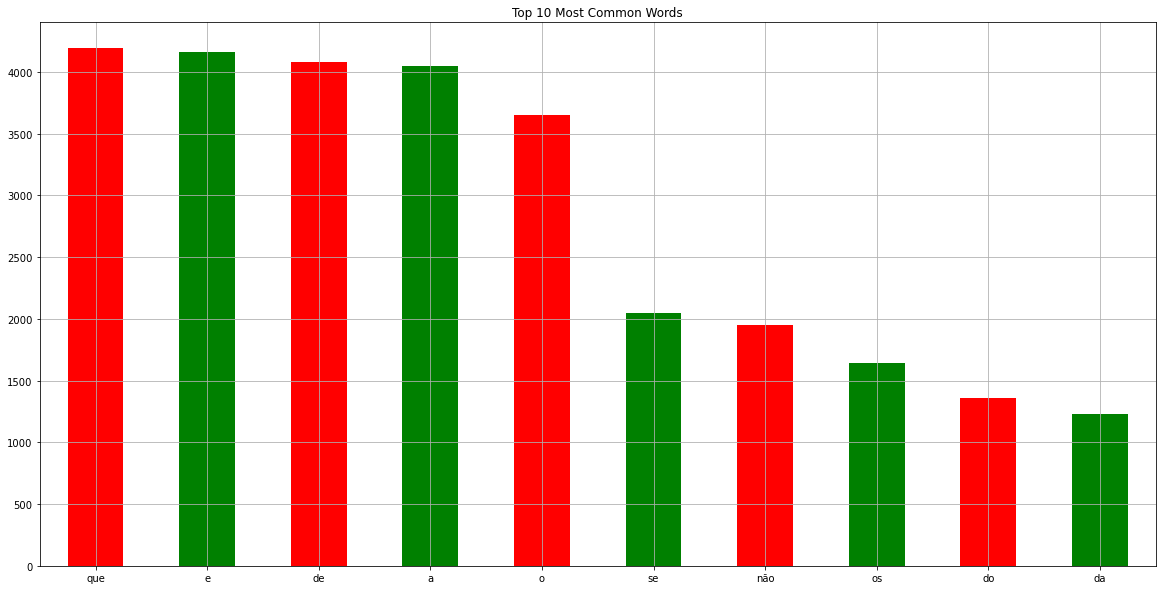

In [12]:
freq = pd.Series(words_in_df).value_counts()

colors = ['g', 'r'] * 2

if freq[0]%2 == 0:
    colors = colors[::-1]

freq[0:10].plot(kind='bar', figsize=(20, 10), rot=0, color = colors, )


plt.title("Top 10 Most Common Words")
plt.grid()
plt.show()

- Cleaning Data Round 1

In [23]:
def clean_text_round1(text):
    text = text.lower() #### Make text lowercase
    text = re.sub('\[.*?\]', '', text)  ### remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) ### remove punctuation
    text = re.sub('\w*\d\w*', '', text) #### remove words containing numbers
    return text

first_clean = lambda x: clean_text_round1(x)

round1 = clean_text_round1(text)

round1[0:50]

'memorial do convento josé saramago josé saramago n'

In [14]:
type(round1)

str

- Cleaning Data Round 2

In [15]:
def clean_text_round2(round1):
    text = re.sub('[‘’“”…]', '', round1) ### some additional punctuation
    text = re.sub('\n', '', round1) ### non sensical text
    return text

second_clean = lambda x: clean_text_round2(x)

round2 = clean_text_round2(round1)

In [16]:
type(round2)

str

In [26]:
words_in_df = ''.join(round2).split()

### Stop Words

- Find which words are considered "Stop" words

In [33]:
stop = set(stopwords.words('portuguese'))

In [42]:
round3 = [word for word in words_in_df if word not in stop] 

In [35]:
#### Amount of stop words removed from our corpus

len([word for word in words_in_df if word not in stop])

64478

In [36]:
#final_text = "".join(str(clean_text_round3) for x in clean_text_round3).split()

In [61]:
round3[0:5]

['memorial', 'convento', 'josé', 'saramago', 'josé']

In [45]:
type(round3)

list

In [46]:
final_round = ' '.join(map(str, round3))

In [48]:
type(final_round)

str

In [60]:
word_tokenize(final_round)[0:5]

['memorial', 'convento', 'josé', 'saramago', 'josé']

In [92]:
from collections import defaultdict
from pathlib import Path
import pandas as df

my_dir_path = r"C:\Users\raimu\Desktop\Train Corpora\LuisaMarquesSilva"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r", encoding = "utf8") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df = pd.DataFrame(results)

In [93]:
df

,file_name,text
0,ABelaHistoria.txt,A BELA HISTÓRIA DE DINIS E BEATRIZ OU REQUIEM ...
1,acabouSe.txt,\n\n\nAcabou-se!\nLuísa Marques da Silva\n\nTí...
2,Botão.txt,O terrível caso do botão assassino\nLuísa Marq...
3,controlz.txt,CONTROL Z\nChegou a hora de vos contar. Chegou...
4,emedo.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...
5,Lisboa2050.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã..."
6,passeioInferno.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...
7,rapsodiasemdo.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...
8,UltimaHistoria.txt,Título\nA última história\n\nAutora (próximo N...
